# Metrowest machine learning self-driving car
```
The project is a self-driving car.
This notebook trains the the CNN.
Refer to the .pdf for details
  
Much of this is taken from Kiras CIFAR-10 example - see reference.

References:
https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
https://www.meetup.com/Natick-Artificial-Intelligence-Meetup/
https://github.com/experiencor.self-driving-toy-car/
http://vision.stanford.edu/teaching/cs231n/
https://www.tensorflow.org/
```

In [1]:
# force libraries to re-load every time - helpful during development
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../lib')

# Data Loading

In [3]:
from metrowestcar_dataset import Dataset
dataset = Dataset.data()


In [4]:
from __future__ import print_function
import keras

num_classes = 4

# input image dimensions
import my_globals as mygl
input_shape = (1, mygl.IMAGE_H, mygl.IMAGE_W)

# the data, split between train and test sets
dataset = Dataset.data()
x_train_raw = dataset['images_train']
x_test_raw  = dataset['images_test']
y_train_raw = dataset['steering_train']
y_test_raw  = dataset['steering_test']

# dataset is uint8 but Kiras expects float - do this conversion
# also - convert class vectors to binary (1-hot) encoded array

x_train = x_train_raw.astype('float32')
x_test = x_test_raw.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)

print("x_train before:" + str(type(x_train_raw[0][0][0][0])))
print("x_train after: " + str(type(x_train[0][0][0][0])))
print("y_train before " + str(type(y_train_raw)) + " " + str(y_train_raw.shape) + " " +  str(type(y_train_raw[0])))
print("y_train after  " + str(type(y_train)) + " " + str(y_train.shape) + str(type(y_train[0][0])))

Using TensorFlow backend.


x_train before:<class 'numpy.uint8'>
x_train after: <class 'numpy.float32'>
y_train before <class 'numpy.ndarray'> (15136,) <class 'numpy.uint32'>
y_train after  <class 'numpy.ndarray'> (15136, 4)<class 'numpy.float32'>


## Construct the Model

In [5]:
'''Trains a CNN on the dataset.
'''

from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 90, 180, 32)       896       
_________________________________________________________________
activation_1 (Activation)    (None, 90, 180, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 88, 178, 32)       9248      
_________________________________________________________________
activation_2 (Activation)    (None, 88, 178, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 89, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 44, 89, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 89, 64)        18496     
__________

# Train the model

In [6]:
batch_size = 32
epochs = 3
data_augmentation = False

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'metrowest_keras_trained_model.h5'


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

assert data_augmentation is False, "data augmentation is not coded"

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)


# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 15136 samples, validate on 3785 samples
Epoch 1/3
15136/15136 [==============================] - 1574s 104ms/step - loss: 0.5607 - acc: 0.7653 - val_loss: 0.4036 - val_acc: 0.8557
Epoch 2/3
15136/15136 [==============================] - 1602s 106ms/step - loss: 0.3752 - acc: 0.8541 - val_loss: 0.3623 - val_acc: 0.8727
Epoch 3/3
15136/15136 [==============================] - 1670s 110ms/step - loss: 0.3258 - acc: 0.8740 - val_loss: 0.3881 - val_acc: 0.8359
Saved trained model at C:\code_metrowest\metrowest_scikit_tensorflow_cnn_car\project\model\saved_models\metrowest_keras_trained_model.h5 
3785/3785 [==============================] - 125s 33ms/step
Test loss: 0.3880690471735467
Test accuracy: 0.835931307809671


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


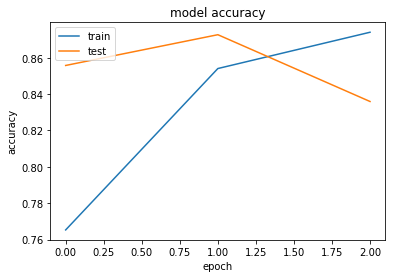

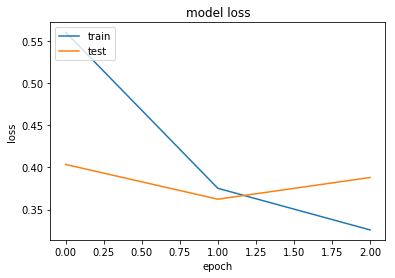

In [8]:
#import pyplot as plt
import matplotlib.pyplot as plt

# Plot loss as a function of iteration number
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [146]:
# apply an image to the trained CNN
from metrowestcar_display import Displayer
displayer = Displayer()

image = x_train_raw[5]
displayer.display_image(image)
image = image.astype('float32')
image /= 255

image = image[np.newaxis, :]
steering_out = model.predict(image)[0]
s_max = np.where(steering_out==steering_out.max())
s_index = s_max[0][0]
if s_index == 1:
    print("left")
elif s_index == 2:
    print("right")
elif s_index == 3:
    print("center")
else:
    assert False, "something wrong in prediction %r" % s_index


center
